In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file ='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [3]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)


In [4]:
classLabels = []
file_name = 'label.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    

In [5]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
print(len(classLabels))

80


In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) #255/2 = 127.5
model.setInputMean((127.5,127.5,127.5)) # mobilenet => [-1,1]
model.setInputSwapRB(True)

< cv2.dnn.Model 00000200184F97D0>

READ AN IMAGE

In [8]:
img = cv2.imread('traffictrail.png')

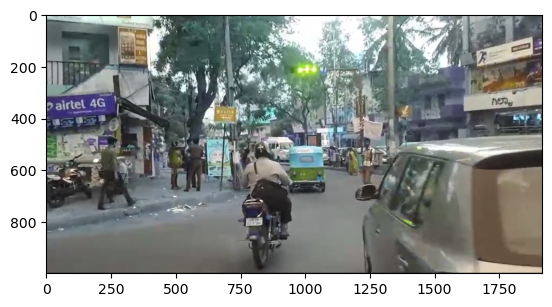

In [9]:
plt.imshow(img)

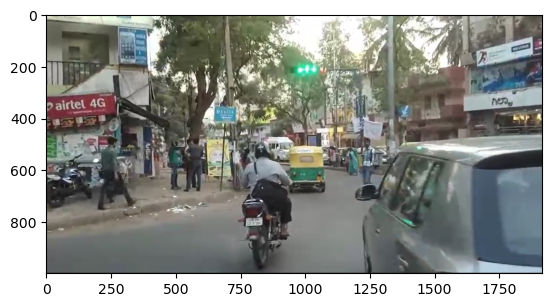

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [11]:
ClassIndex, confidence, bbox= model.detect(img,confThreshold=0.55)

In [12]:
print (ClassIndex)

[1 4 3 1 1 1 1]


In [13]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0),thickness=3)

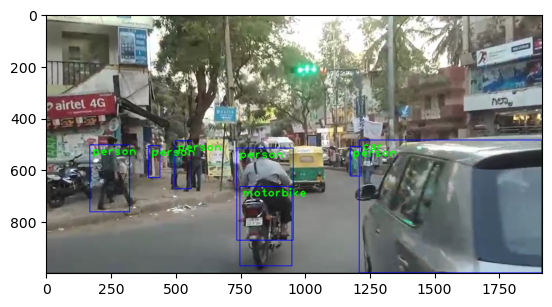

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

VIDEO TEST

In [15]:
cap = cv2.VideoCapture("dev traffic.mp4")

if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open video")
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()

    ClassIndex, confidence, bbox = model.detect(frame,confThreshold=0.55)

    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0),thickness=3)

    cv2.imshow('object Detection', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

[ 1  3  3  4  3  3  6 10  6  8  1]
[ 3  1  3  4  6  8  3 10  6  6]
[ 3  1  3  4  3  8 10  6  6  6]
[ 3  3  1  4  6  8  1  6  3  3 10 10  1]
[ 3  3  1  4  6  8  1  3  1  3 10  6 10]
[ 3  3  4  1  3  6  1  8  3  6 10  3  1]
[ 3  3  4  3  1  8 10  1  3  3  6  1]
[ 3  3  1  4  3  8 10  3  8]
[ 1  3  3  3  4 10  8  8]
[ 1  3  3  3  4  8 10  4  1  3  4  1]
[ 1  3  3  4  4  3 10  1  8  8]
[ 3  1  3  4  4  3  6  8 10]
[ 3  1  4  3  4  6  8 10  3  1  6]
[3 1 4 3 1 6 4 8 3 6 8]
[ 3  1  4  3  8  3 10  1  3  8]
[ 3  1  3  4  8  3 10  1  1  8  6]
[ 3  1  3  4 10  8  1  3  6  1  8  1]
[ 3  1  3  4  1  1  1  4 10  1  8  1]
[ 3  3  1  4  3  4  4  6  8  1 10  8]
[ 3  3  4  1  1  3 10  1  8  1  1  6  4]
[ 3  3  4  1  3  6  8 10]
[ 3  3  4  1  8  6  3  1  1  1 10  1]
[ 3  3  1  4  6  4  8  1  1  3 10  1]
[3 3 1 4 6 4 4 1 8 6 1 6 8 3]
[3 3 4 1 3 1 8 8]
[ 3  3  4  4  1  8 10  1]
[ 3  3  4  4  1 10]
[3 3 4 4 1 3 1]
[3 3 4 1 4 1 1]
[3 3 4 4 1 8 4 3]
[3 3 4 4 1 1]
[3 3 4 1 4 1 3 3]
[ 3  3  4 10  8  3  3  1  1

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Constants
CONFIG_FILE = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
FROZEN_MODEL = 'frozen_inference_graph.pb'
LABEL_FILE = 'label.txt'
VIDEO_FILE = 'dev_traffic.mp4'
CONF_THRESHOLD = 0.55

# Load class labels
with open(LABEL_FILE, 'rt') as f:
    class_labels = f.read().rstrip('\n').split('\n')

# Initialize model
model = cv2.dnn_DetectionModel(FROZEN_MODEL, CONFIG_FILE)
model.setInputSize(320, 320)
model.setInputScale(1.0 / 127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

# Function to perform object detection on an image
def detect_objects(image):
    class_indices, confidences, boxes = model.detect(image, confThreshold=CONF_THRESHOLD)
    for class_index, confidence, box in zip(class_indices.flatten(), confidences.flatten(), boxes):
        if class_index <= len(class_labels):
            cv2.rectangle(image, box, (255, 0, 0), 2)
            cv2.putText(image, class_labels[class_index - 1], (box[0] + 10, box[1] + 40),
                        cv2.FONT_HERSHEY_PLAIN, 3, (0, 255, 0), thickness=3)
    return image

# Process image
img = cv2.imread('traffictrail.png')
plt.imshow(cv2.cvtColor(detect_objects(img), cv2.COLOR_BGR2RGB))
plt.show()

# Process video
cap = cv2.VideoCapture("dev traffic.mp4")
if not cap.isOpened():
    raise IOError("Cannot open video: {}".format(VIDEO_FILE))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = detect_objects(frame)
    cv2.imshow('Object Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()
